In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("asia_grill_2024_categorized2.xlsx")

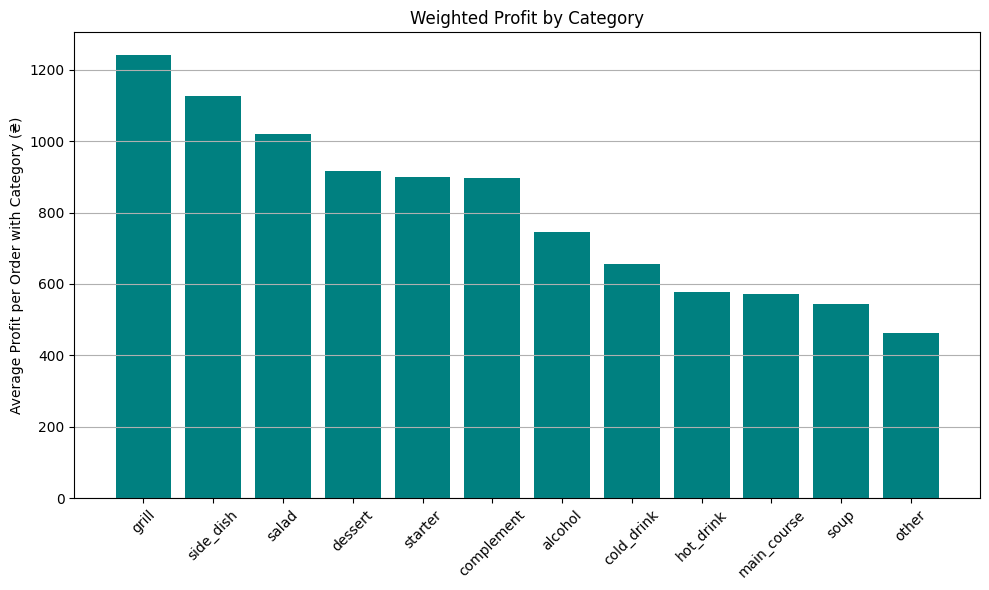

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("order01_in_cafe_profit.xlsx")

df['profit'] = df['profit'].astype(str).str.replace(',', '.').astype(float)

category_cols = [
    'alcohol', 'cold_drink', 'complement', 'dessert', 'grill', 'hot_drink',
    'main_course', 'other', 'salad', 'side_dish', 'soup', 'starter'
]

category_profit = {}
category_counts = {}

for cat in category_cols:

    mask = df[cat] == 1
    category_profit[cat] = df.loc[mask, 'profit'].sum()
    category_counts[cat] = mask.sum()

weighted_profit = {
    cat: category_profit[cat] / category_counts[cat] if category_counts[cat] > 0 else 0
    for cat in category_cols
}

weighted_df = pd.DataFrame.from_dict(weighted_profit, orient='index', columns=['Weighted Profit'])
weighted_df = weighted_df.sort_values('Weighted Profit', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(weighted_df.index, weighted_df['Weighted Profit'], color='teal')
plt.ylabel('Average Profit per Order with Category (₴)')
plt.title('Weighted Profit by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['closed'] = pd.to_datetime(df['closed'])
df['month'] = df['closed'].dt.to_period('M')
df['profit'] = df['profit'].astype(str).str.replace(',', '.').astype(float)

category_cols = [
    'alcohol', 'cold_drink', 'complement', 'dessert', 'grill', 'hot_drink',
    'main_course', 'other', 'salad', 'side_dish', 'soup', 'starter'
]

weighted_data = []

for month, group in df.groupby('month'):
    for category in category_cols:
        mask = group[category] == 1
        total_profit = group.loc[mask, 'profit'].sum()
        count = mask.sum()
        weighted_profit = total_profit / count if count > 0 else 0
        weighted_data.append({
            'month': month,
            'category': category,
            'weighted_profit': weighted_profit
        })

weighted_df = pd.DataFrame(weighted_data)
pivot_df = weighted_df.pivot(index='month', columns='category', values='weighted_profit').fillna(0)
pivot_df = pivot_df.sort_index()
colors = plt.cm.tab20.colors
plt.figure(figsize=(14, 8))
for i, category in enumerate(pivot_df.columns):
    plt.plot(
        pivot_df.index.astype(str),
        pivot_df[category],
        label=category,
        color=colors[i % len(colors)]
    )

plt.title('Monthly Weighted Profit per Category')
plt.xlabel('Month')
plt.ylabel('Average Profit per Order with Category (₴)')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


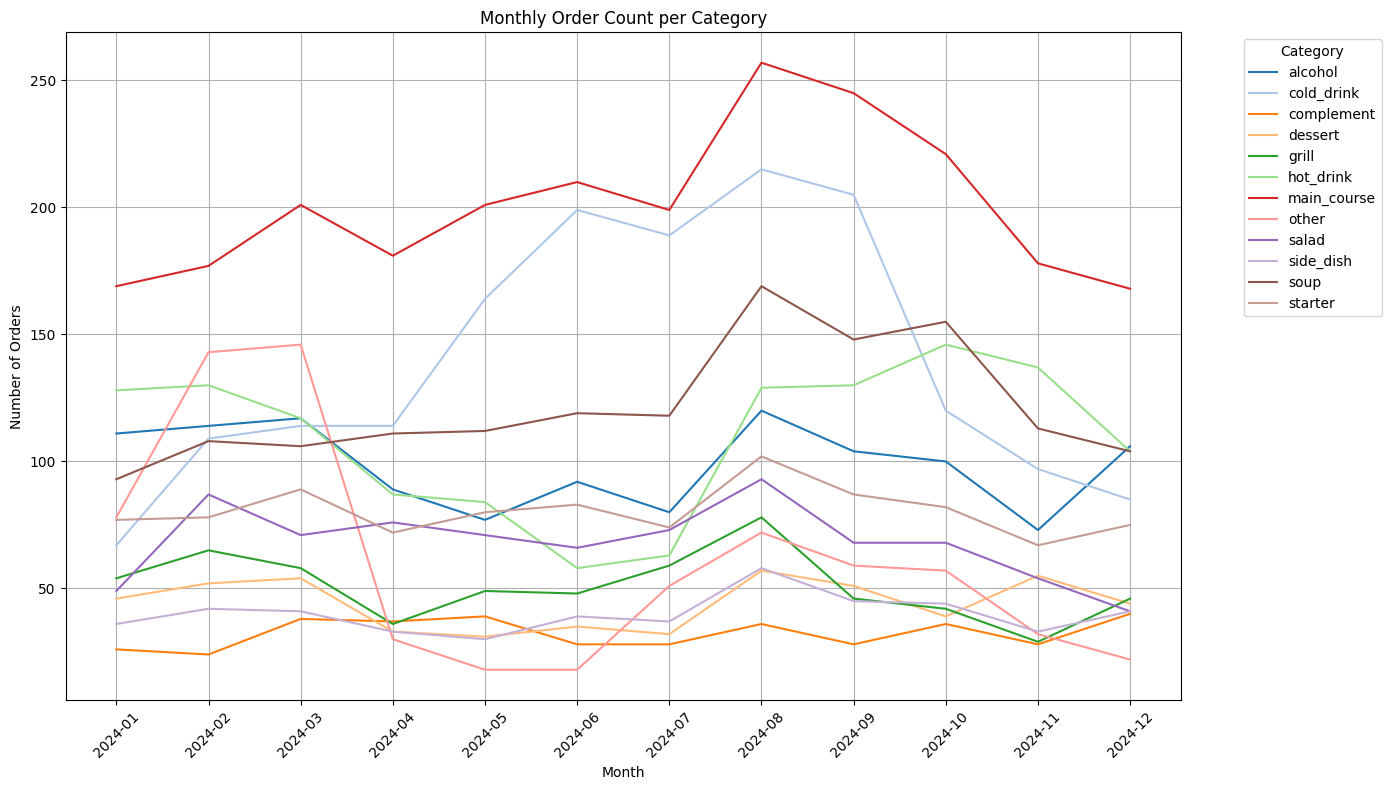

In [ ]:
count_data = []
for month, group in df.groupby('month'):
    for category in category_cols:
        count = (group[category] == 1).sum()
        count_data.append({
            'month': month,
            'category': category,
            'order_count': count
        })

count_df = pd.DataFrame(count_data)

count_pivot = count_df.pivot(index='month', columns='category', values='order_count').fillna(0)
count_pivot = count_pivot.sort_index()

colors = plt.cm.tab20.colors
plt.figure(figsize=(14, 8))
for i, category in enumerate(count_pivot.columns):
    plt.plot(
        count_pivot.index.astype(str),
        count_pivot[category],
        label=category,
        color=colors[i % len(colors)]
    )

plt.title('Monthly Order Count per Category')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


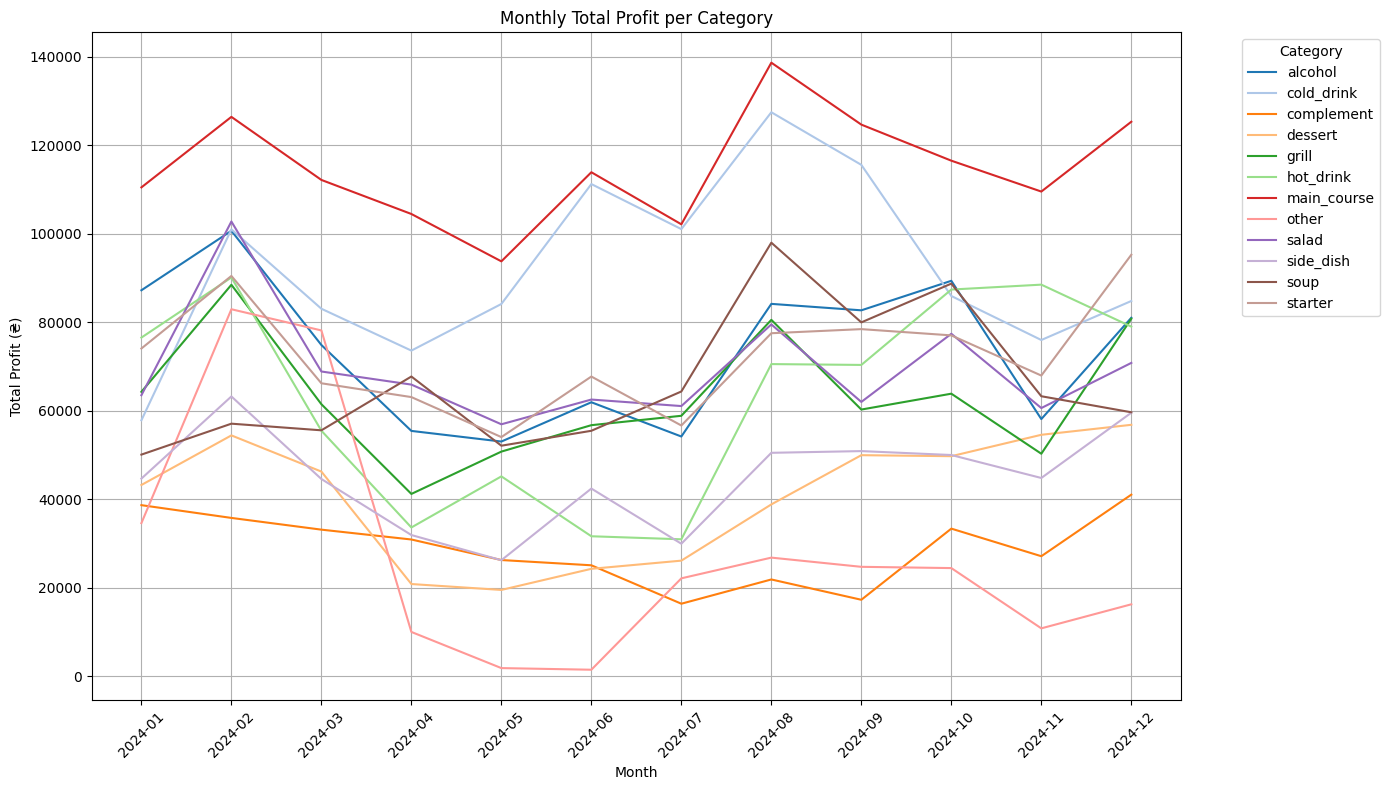

In [ ]:
raw_profit_df = []

for month, group in df.groupby('month'):
    for category in category_cols:
        total_profit = group.loc[group[category] == 1, 'profit'].sum()
        raw_profit_df.append({
            'month': month,
            'category': category,
            'total_profit': total_profit
        })

raw_profit_df = pd.DataFrame(raw_profit_df)

raw_profit_pivot = raw_profit_df.pivot(index='month', columns='category', values='total_profit').fillna(0)
raw_profit_pivot = raw_profit_pivot.sort_index()

colors = plt.cm.tab20.colors
plt.figure(figsize=(14, 8))
for i, category in enumerate(raw_profit_pivot.columns):
    plt.plot(
        raw_profit_pivot.index.astype(str),
        raw_profit_pivot[category],
        label=category,
        color=colors[i % len(colors)]
    )

plt.title('Monthly Total Profit per Category')
plt.xlabel('Month')
plt.ylabel('Total Profit (₴)')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()
